<a href="https://colab.research.google.com/github/hdpark1208/StudyCode/blob/main/NLP/NLP_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 선형회귀 실습

In [ ]:
import tensorflow as tf

### 텐서플로우

In [ ]:
w = tf.Variable(2.)

def f(w):
  y = w**2
  z = 2*y + 5
  return z

In [ ]:
with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


In [ ]:
# 학습될 가중치 변수를 선언
W = tf.Variable(4.0)
b = tf.Variable(1.0)

In [ ]:
@tf.function
def hypothesis(x):
    return W*x + b

In [ ]:
x_test = [3.5,5,5.5,6]
hypothesis(x_test).numpy() # 적용시켜보기

array([15., 21., 23., 25.], dtype=float32)

In [ ]:
def mse_loss(y_pred,y):
    return tf.reduce_mean(tf.square(y_pred - y))

In [ ]:
X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

In [ ]:
optimizer = tf.optimizers.SGD(0.01) # 학습률 설정

In [ ]:
for i in range(301):
  with tf.GradientTape() as tape:
    # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = hypothesis(X)

    # 평균 제곱 오차를 계산
    cost = mse_loss(y_pred, y)

  # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [W, b])

  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [W, b]))

  if i % 10 == 0:
    print("epoch : {:3} | W의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, W.numpy(), b.numpy(), cost))

epoch :   0 | W의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | W의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | W의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | W의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | W의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | W의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | W의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | W의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | W의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | W의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | W의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | W의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | W의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | W의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | W의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | W의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [ ]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


## 로지스틱 회귀 실습

In [ ]:
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립 사용

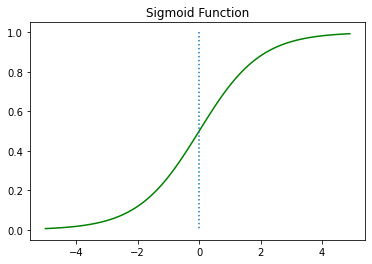

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x)) # W = 1, b = 0
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

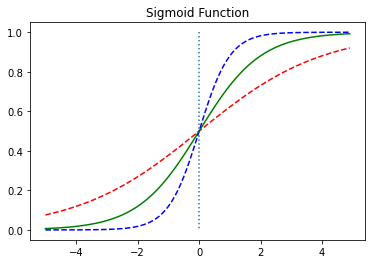

In [ ]:
def sigmoid(x): # W 에 따른 그래프
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

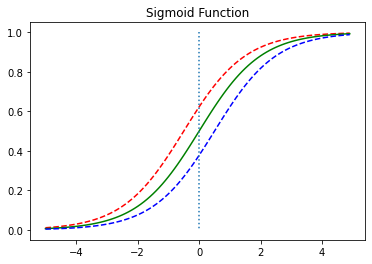

In [ ]:
def sigmoid(x): # b 에 따른 그래프
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x)
y3 = sigmoid(x-0.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

* 로지스틱 회귀 또한 경사 하강법을 사용하여 가중치 를 찾아내지만, 비용 함수로는 평균 제곱 오차를 사용하지 않습니다. 그 이유는 시그모이드 함수에 비용 함수를 평균 제곱 오차로 하여 그래프를 그리면 로컬 미니멈, 글로벌 미니멈이 생겨 경사 하강법 사용 시 잘못된 최소값에 빠질 우려가 있다

* 로지스틱 회귀에서 찾아낸 비용 함수를 크로스 엔트로피(Cross Entropy)함수라고 합니다. 즉, 결론적으로 로지스틱 회귀는 비용 함수로 크로스 엔트로피 함수를 사용하며, 가중치를 찾기 위해서 크로스 엔트로피 함수의 평균을 취한 함수를 사용합니다

* 시그모이드 함수는 0과 1사이의 y값을 반환합니다. 이는 실제값이 0일 때 값이 1에 가까워지면 오차가 커지며 실제값이 1일 때 y값이 0에 가까워지면 오차가 커짐을 의미합니다. 그리고 이를 반영할 수 있는 함수는 로그 함수를 통해 표현이 가능합니다

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [ ]:
X = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) #숫자 10부터 1

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

# 옵티마이저는 경사하강법 sgd를 사용합니다.
# 손실 함수(Loss function)는 binary_crossentropy(이진 크로스 엔트로피)를 사용합니다.
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd ,loss='binary_crossentropy', metrics=['binary_accuracy'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 200번 시도합니다.
model.fit(X,y, batch_size=1, epochs=200, shuffle=False)

Epoch 1/200
13/13 [==============================] - 0s 910us/step - loss: 0.2832 - binary_accuracy: 0.9231
Epoch 2/200
13/13 [==============================] - 0s 614us/step - loss: 0.2673 - binary_accuracy: 0.9231
Epoch 3/200
13/13 [==============================] - 0s 844us/step - loss: 0.2526 - binary_accuracy: 0.9231
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 0.2393 - binary_accuracy: 0.9231
Epoch 5/200
13/13 [==============================] - 0s 841us/step - loss: 0.2276 - binary_accuracy: 0.9231
Epoch 6/200
13/13 [==============================] - 0s 2ms/step - loss: 0.2176 - binary_accuracy: 0.9231
Epoch 7/200
13/13 [==============================] - 0s 846us/step - loss: 0.2095 - binary_accuracy: 0.9231
Epoch 8/200
13/13 [==============================] - 0s 767us/step - loss: 0.2031 - binary_accuracy: 0.9231
Epoch 9/200
13/13 [==============================] - 0s 614us/step - loss: 0.1982 - binary_accuracy: 0.9231
Epoch 10/200
13/13 [============

13/13 [==============================] - 0s 846us/step - loss: 0.1292 - binary_accuracy: 0.9231
Epoch 77/200
13/13 [==============================] - 0s 844us/step - loss: 0.1286 - binary_accuracy: 0.9231
Epoch 78/200
13/13 [==============================] - 0s 861us/step - loss: 0.1280 - binary_accuracy: 0.9231
Epoch 79/200
13/13 [==============================] - 0s 844us/step - loss: 0.1275 - binary_accuracy: 0.9231
Epoch 80/200
13/13 [==============================] - 0s 614us/step - loss: 0.1269 - binary_accuracy: 0.9231
Epoch 81/200
13/13 [==============================] - 0s 638us/step - loss: 0.1264 - binary_accuracy: 0.9231
Epoch 82/200
13/13 [==============================] - 0s 846us/step - loss: 0.1258 - binary_accuracy: 0.9231
Epoch 83/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1253 - binary_accuracy: 0.9231
Epoch 84/200
13/13 [==============================] - 0s 986us/step - loss: 0.1248 - binary_accuracy: 0.9231
Epoch 85/200
13/13 [==============

13/13 [==============================] - 0s 798us/step - loss: 0.0995 - binary_accuracy: 0.9231
Epoch 152/200
13/13 [==============================] - 0s 2ms/step - loss: 0.0992 - binary_accuracy: 0.9231
Epoch 153/200
13/13 [==============================] - 0s 766us/step - loss: 0.0989 - binary_accuracy: 0.9231
Epoch 154/200
13/13 [==============================] - 0s 771us/step - loss: 0.0987 - binary_accuracy: 0.9231
Epoch 155/200
13/13 [==============================] - 0s 614us/step - loss: 0.0984 - binary_accuracy: 0.9231
Epoch 156/200
13/13 [==============================] - 0s 758us/step - loss: 0.0981 - binary_accuracy: 0.9231
Epoch 157/200
13/13 [==============================] - 0s 767us/step - loss: 0.0979 - binary_accuracy: 0.9231
Epoch 158/200
13/13 [==============================] - 0s 614us/step - loss: 0.0976 - binary_accuracy: 0.9231
Epoch 159/200
13/13 [==============================] - ETA: 0s - loss: 7.3822e-08 - binary_accuracy: 1.000 - 0s 690us/step - loss: 0.097

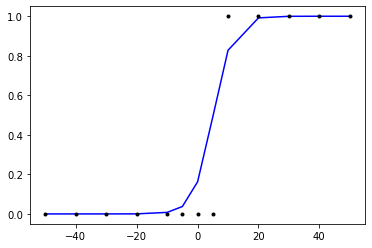

In [ ]:
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

In [ ]:
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

[[0.21099943]
 [0.26938832]
 [0.3370329 ]
 [0.41208297]
 [0.45146096]]
[[0.8690885 ]
 [0.99396884]
 [0.9997557 ]
 [0.9999901 ]
 [1.        ]]


* 로지스틱회귀에서 비용함수로 크로스엔트로피를 쓰는 이유  
https://wikidocs.net/22881

* 비용함수가 여러개 있는데 각각의 평가 방법이 공평한지 의문이 들었다. 예컨데 한 고정된 테스트셋에서 오차 값이 비용함수에 따라 달라질텐데 그 절대값이 적다고해서 그 비용함수가 더 좋다는건 아닐테니. 가령 쉬운 국어시험에서 90점 맞는 것 보다 어려운 수학시험에서 70 점 맞는 것이 더 잘한 것이니까.  
* 이 고민은 쓸데없는것같다 우리는 오차 값 자체보다 각각의 비용함수에서 오차 값이 최소 일 때의 파라미터?(weight, bias) 에 관심이 있는거니까? 그것을 테스트셋에 적용해서 보다 최적의 해를 구하는 것이 목적이니까